# Traffic Sign Classification Using SVM

Dataset used- German Traffic Sign Recognition Dataset (GTSRB). 



## Methods implemented in this notebook:
- LinearSVC
- GridSearchCV to find best alpha for SGDClassifier
- GridSearchCV for alpha=1

## My Google Drive link to pickled dataset file- https://drive.google.com/open?id=1W5xABCisEdAsyCGmLY5k3V59Kh_iscP7

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importing necessary libraries 

In [0]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.svm import LinearSVC

## Reading training, test and validation data in a dataframe

In [0]:
train_df= pd.read_pickle('/content/drive/My Drive/traffic_sign_classification/train.p')
test_df = pd.read_pickle('/content/drive/My Drive/traffic_sign_classification/test.p')
val_df = pd.read_pickle('/content/drive/My Drive/traffic_sign_classification/valid.p')

## Selecting image features and labels as data input and output

In [0]:
X_train, y_train = train_df['features'], train_df['labels']
X_test, y_test = test_df['features'], test_df['labels']
X_val, y_val = val_df['features'], val_df['labels']


## Function to convert RGB images to grayscale images

In [0]:
def convert_to_grayscale(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return gray

## Function to perform Gaussian blurring on grayscale data

In [0]:
# Gaussian filter is performed in Canny detection, this step is to see the 
#transformation in data and to see how Gaussian blur reduces noise in the images
def blur_image(image):
  blur = cv2.GaussianBlur(image,(3,3),0)
  return blur

## Canny Edge detection function that takes input as grayscale images and gives edge detected images as output

In [0]:
def canny_edge_detection(image):
  edges = cv2.Canny(image,30,40)
  return edges

## Preprocessing input data using defined functions


In [0]:
grayscale_train = list(map(convert_to_grayscale,X_train))
blur_train = list(map(blur_image,grayscale_train))
edge_detection_train = list(map(canny_edge_detection, grayscale_train))


## Checking the images after each step of preprocessing

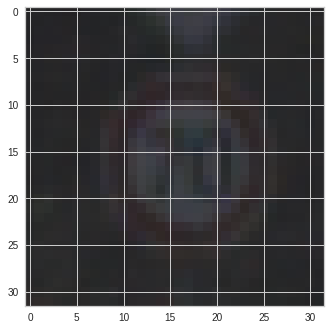

In [54]:
plt.imshow(X_train[7000],cmap= "gray")

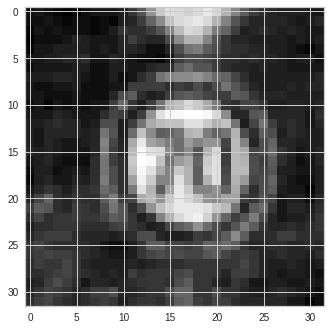

In [55]:
plt.imshow(grayscale_train[7000],cmap= "gray")

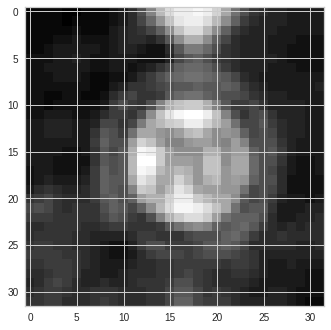

In [56]:
plt.imshow(blur_train[7000],cmap= "gray")

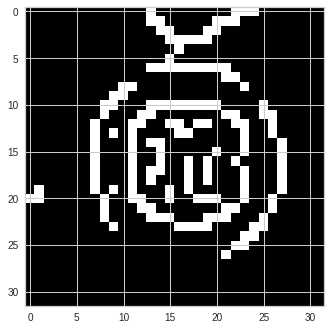

In [57]:
plt.imshow(edge_detection_train[7000],cmap= "gray")

In [0]:
grayscale_test = list(map(convert_to_grayscale,X_test))

blur_test = list(map(blur_image,grayscale_test))

edge_detection_test = list(map(canny_edge_detection, grayscale_test))


In [0]:
edge_detection_train = np.asarray(edge_detection_train, dtype=np.float32)
edge_detection_test = np.asarray(edge_detection_test, dtype=np.float32)

In [0]:
n_samples_train = len(X_train)
n_samples_test = len(X_test)

flatten_train = edge_detection_train.reshape((n_samples_train, -1))
flatten_test = edge_detection_test.reshape((n_samples_test, -1))

## Using LinearSVC for SVM classification

In [58]:
clf_linearsvc = LinearSVC(random_state=0, tol=1e-5)
clf_linearsvc.fit(flatten_train, y_train)
y_pred_linear_svc = clf.predict(flatten_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_linear_svc))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 0.616547901821061


## **Accuracy of LinearSVC classifier: 61.65%**

## Using GridSearchCV to tune alpha parameter for better accuracy, the default value of alpha is 0.0001

In [0]:
from sklearn.model_selection import GridSearchCV
def svc_param_selection(X, y, nfolds):
    alphas = [0.0001,0.001, 0.01, 0.1, 1]
    param_grid = {'alpha': alphas}
    grid_search = GridSearchCV(linear_model.SGDClassifier(max_iter=1000, tol=1e-3), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [0]:
params = svc_param_selection(flatten_train, y_train, 5)


In [53]:
print(params)


{'alpha': 1}


## Plotting Class Prediction Error for SGDClassifier(alpha=1)

0.6123515439429928

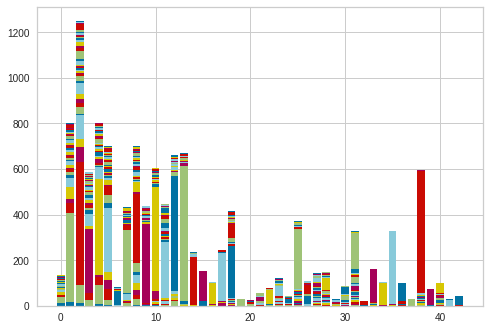

In [59]:
from yellowbrick.classifier import ClassPredictionError


classes = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]

visualizer = ClassPredictionError(linear_model.SGDClassifier(max_iter=1000, tol=1e-3,alpha=1), classes=classes)

visualizer.fit(flatten_train, y_train)

visualizer.score(flatten_test, y_test)

## Training the SGDClassifier using alpha =1 to check the accuracy

In [0]:
from sklearn import linear_model

clf = linear_model.SGDClassifier(max_iter=1000, tol=1e-3,alpha=1)
clf.fit(flatten_train, y_train)

## Testing for SGDClassifier(alpha=1)

In [0]:
y_pred1 = svclassifier.predict(flatten_test)

In [18]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

Accuracy: 0.6715756136183689


## **The accuracy of the model with SGDClassifier(alpha=1): 67.15%**

# References:
- https://blog.hyperiondev.com/index.php/2019/02/18/machine-learning/
- https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
- https://github.com/mohamedameen93/German-Traffic-Sign-Classification-Using-TensorFlow/blob/master/Traffic_Sign_Classifier.ipynb